# Insurance Medical Cost Prediction

## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Download the data from Google Drive

#### Path To Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Path_to_data = '/medical_cost.csv'

#### Read & Visualize Data

In [ ]:
# read CSV file in Pandas
data = pd.read_csv(Path_to_data)

# display first 10 rows
data.head(10)

## 2. Exploratory Data Analysis

Check how many rows & columns in our dataset

In [ ]:
# get the number of rows and columns
rows = data.shape[0]
columns = data.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 1338 rows and 7 columns.


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Distribution of charges

First, let's look at the distribution of charges. This will help us to know how much patients spend on treatment on average.

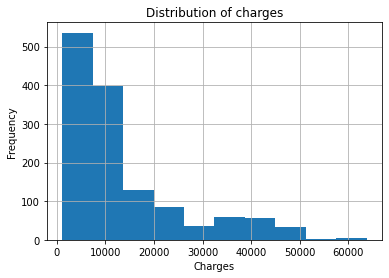

In [ ]:
# plot the histogram of the charges
data["charges"].hist()
plt.title("Distribution of charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

#### Correlation between smoking and cost of treatment

Let's see if smokers spend more or less on treatment than non-smokers!

First, let's see how many smokers vs non-smokers we have.

In [ ]:
# select smokers
smokers = data[data['smoker'] == 'yes']

# select non smokers
non_smokers = data[data['smoker'] == 'no']

print('There are {} smokers and {} non-smokers.'.format(smokers.shape[0], non_smokers.shape[0]))

There are 274 smokers and 1064 non-smokers.


Now let's plot the charges for both.

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

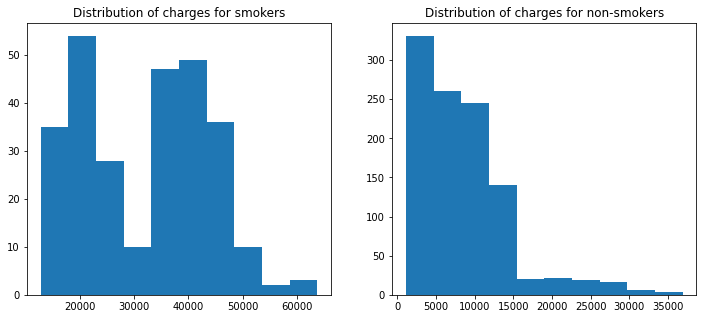

In [ ]:
# create the figure
fig = plt.figure(figsize=(12,5))

# add first sub plot for smokers
ax = fig.add_subplot(121)
# draw distribution of charges for smokers
ax.hist(smokers['charges'])
# set sub plot title
ax.set_title('Distribution of charges for smokers')

# add second sub plot for non smokers
ax = fig.add_subplot(122)
# draw distribution of charges for non-smokers
ax.hist(non_smokers['charges'])
# set sub plot title
ax.set_title('Distribution of charges for non-smokers')

Smoking patients spend more on treatment.

#### Correlation between age and cost of treatment

First, let's look at the distribution of age in our dataset, and then look at how age affects the cost of treatment.

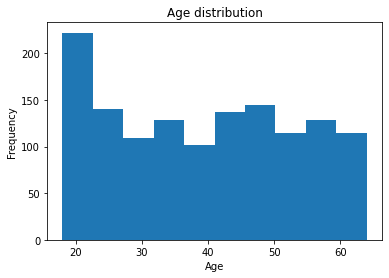

In [ ]:
# plot histogram for age distribution
plt.hist(data['age'])
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Let's plot the correlation between age and cost of treatment

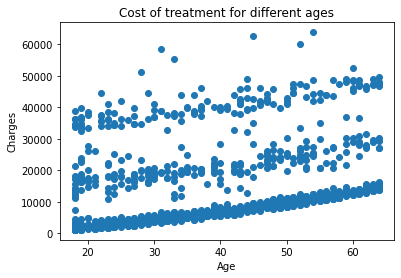

In [ ]:
# draw a scatter plot to show correlation between age and charges
plt.scatter(data['age'], data['charges'])
plt.title("Cost of treatment for different ages")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

Let's check if smoking also affects this curve.

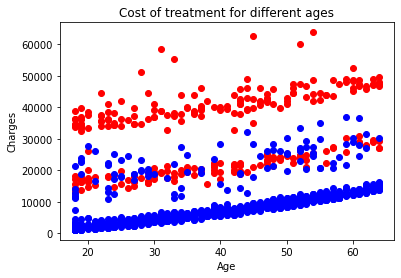

In [ ]:
plt.scatter(smokers["age"], smokers["charges"], color='r')
plt.scatter(non_smokers["age"], non_smokers["charges"], color='b')
plt.title("Cost of treatment for different ages")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

#### Correlation between BMI and cost of treatment

First, let's look at the distribution of BMI in our dataset, and then look at how it affects the cost of treatment.

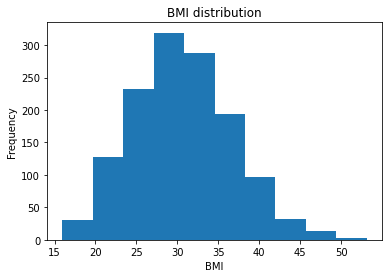

In [ ]:
# draw a histogram to show the distribution of BMI
data["bmi"].plot(kind = 'hist')
plt.title("BMI distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

According to the chart above, obesity starts at BMI = 30. Let's investigate the impact of BMI on cost of treatment.

In [ ]:
# select obese people
obese = data[data['bmi'] >= 30]
# select overweight people
overweight = data[(data['bmi'] > 25) & (data['bmi'] < 30)]
# select healthy people
healthy = data[data['bmi'] < 25]

print('There are {} obese, {} overweight and {} healthy individuals.'.format(obese.shape[0], overweight.shape[0], healthy.shape[0]))

There are 705 obese, 383 overweight and 245 healthy individuals.


To compare, let's plot the distribution of charges for all 3 groups (obese, overweight and healthy) in 1 plot, while showing `obese` data in red, `overweight` data in yellow and `healthy` data in green.

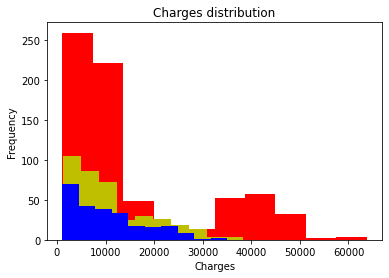

In [ ]:
plt.hist(obese['charges'], color= 'r')
plt.hist(overweight['charges'], color= 'y')
plt.hist(healthy['charges'], color= 'b')
plt.title("Charges distribution")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

Patients with BMI above 30 spend more on treatment!

## 3. Data Preprocessing

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



 Let's start by removing missing data.

In [ ]:
# print how many missing value in each column
data.isnull().sum()

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# drop rows with missing values
data = data.dropna()
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


#### Remove unused columns

Let's remove the `region` column since we don't really care about it

In [ ]:
# dropping the region feature
data.drop('region', axis= 1, inplace= True)
data.head()

<ipython-input-25-50801bdef693>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('region', axis= 1, inplace= True)


,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [ ]:
# define dictionary
gender = {'male':0, 'female':1}
# replace sex column with 0/1
data['sex'] = data['sex'].apply(lambda x: gender[x])
# print head to verify
data.head()

<ipython-input-26-9d1437c2d1f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'] = data['sex'].apply(lambda x: gender[x])


,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,yes,16884.92400
1,18,0,33.770,1,no,1725.55230
2,28,0,33.000,3,no,4449.46200
3,33,0,22.705,0,no,21984.47061
4,32,0,28.880,0,no,3866.85520


And now the smokers column

In [ ]:
# define dictionary
smokers = {'no':0, 'yes':1}
# replace smokers column with 0/1
data['smoker'] = data['smoker'].apply(lambda x: smokers[x])
# print head to verify
data.head()

<ipython-input-28-64dbcf65dc34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoker'] = data['smoker'].apply(lambda x: smokers[x])


,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


#### Normalization

Let's scale all the columns by dividing by the maximum

In [ ]:
# get the max of each column
data_max = data.mean()
data_max

age            39.196255
sex             0.495131
bmi            30.661423
children        1.097378
smoker          0.205243
charges     13283.303988
dtype: float64

In [ ]:
# divide each column by its maximum value
data = data.divide(data_max)
data.describe()

,age,sex,bmi,children,smoker,charges
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.358387,1.010164,0.198981,1.098735,1.968544,0.912347
min,0.459228,0.000000,0.520524,0.000000,0.000000,0.084457
25%,0.688841,0.000000,0.857837,0.000000,0.000000,0.357013
50%,0.994993,0.000000,0.991474,0.911263,0.000000,0.706613
75%,1.301145,2.019667,1.131308,1.822526,0.000000,1.258498
max,1.632809,2.019667,1.732796,4.556314,4.872263,4.800796


## 4. Model Training & Testing



#### Data split

Before training, we need to split data into training (80%) & testing (20%)

In [ ]:
# store all columns excpet last one as inputs in X
X = data.iloc[:,0:-1].values
# store the last column as the output (label) in y
y = data.iloc[:,-1].values

# split dataset in a 80/20 split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1068, 5) (1068,)
(267, 5) (267,)


#### Linear Regression Modeling


In [ ]:
# define our regression model
model = LinearRegression()

# train our model
model.fit(x_train, y_train)
print('Model trained!')

Model trained!


#### Evaluation

In [ ]:
print('Model score {}'.format(model.score(x_test, y_test)))

Model score 0.7411337172845822


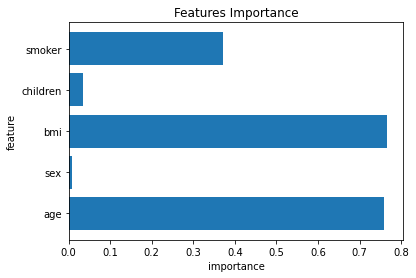

In [ ]:
# check feature importance % coefficient
columns_names = data.columns[0:-1].values
features_importance = model.coef_
plt.barh(columns_names, features_importance)
plt.title('Features Importance')
plt.xlabel('importance')
plt.ylabel('feature')
plt.show()